In [25]:
import numpy as np
import pandas as pd
import thinfilm as tm
import material as ml
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, minimize

R_scan = pd.read_csv('./spectrum/LENS/rev2/R_5_B.csv')['SCAN'].values
wl = np.linspace(400, 700, 301)

air = ml.Non_Dispersion(1)
SiO2 = ml.open_material('SiO2_LENS', 'Sellmeier') 
SiN = ml.open_material('SiN_LENS', 'Sellmeier')
ITO = ml.open_material('ITO_LENS', 'Sellmeier')
OC = ml.open_material('OC_HRI_LENS', 'Material')
sodalime = ml.open_material('sodalime', 'Material')

R_hypo = lambda th: tm.Design(
    [air, SiO2, SiN, OC, ITO, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(wl, 5)

fom = lambda th:sum(abs(R_hypo(th)-R_scan/100))

In [13]:
sol = differential_evolution(fom, [(10,40),(10,40),(1800,1900),(27,30),(20,80),(4,20)])
print(sol.x)

[  13.2363702    20.94713726 1863.87389633   27.           36.58888407
    7.87329195]


In [14]:
sol2 = minimize(fom, sol.x)
print(sol2.x)

[  12.0194352    21.23076177 1864.09352595   25.49269166   34.95576012
    8.0367327 ]


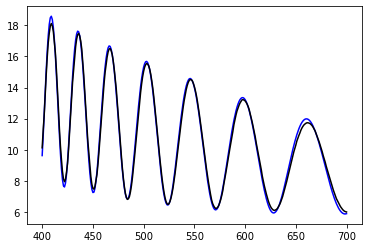

In [26]:
f1 = [13.91047239,21.90481726,1837.3297089,28.29424777,36.09996534,7.87661007]
plt.plot(wl, 100*R_hypo(f1), '-b')
plt.plot(wl, R_scan, '-k')
plt.show()